In [79]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     

from tensorflow import keras
from sklearn.preprocessing import StandardScaler 
#import plotly.graph_objects as go

from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation
   

In [80]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV   

In [81]:
# import data set from the local driver 
dff=pd.read_csv('SWaT_Dataset_Normal_v0.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp') 
df=pd.read_csv('SWaT_Dataset_Attack_v0 - Copy.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp')
frames = [dff,df] 
df_concat=pd.concat(frames) 
df_concat.head(5)    

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


#### Automatic Sensor data extraction 

In [82]:
# df_concat.filter(regex=('^PIT' and '^LIT') ,axis=1).head() 
df1=df_concat.filter(regex='(^Time|^PIT|^AIT|^FIT|^DPI|^LIT|^Norma)',axis=1)#.head()
df1.head() 

,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


In [83]:
# Convert timestamp to datetime format 
df1['Timestamp'] = pd.to_datetime(df1['Timestamp']) 

# # df1.shape

#df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
#df1 = df1.set_index('Timestamp').resample('H').mean().reset_index()
# df1.shape
df1.head()  

/tmp/ipykernel_143344/3374014210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])


,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
2,2015-12-22 16:00:02,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
3,2015-12-22 16:00:03,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
4,2015-12-22 16:00:04,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


In [84]:
# remove the space on Normal/Attack columns 
df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')  
#To see how the data is spread betwen Attack and Normal 
print(df1.groupby('Normal/Attack')['Normal/Attack'].count())  
# Rename the col name Normal/Attack with A   
df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)
df1.head(2)  
   

Normal/Attack
Attack     54621
Normal    892098
Name: Normal/Attack, dtype: int64


/tmp/ipykernel_143344/773326424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')
/tmp/ipykernel_143344/773326424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)


,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


In [85]:
# Convert non-numeric class to numeric

df1.A[df1.A== 'Normal'] = 0 
df1.A[df1.A == 'Attack'] = 1    
df1.head()  

/tmp/ipykernel_143344/3508704847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A== 'Normal'] = 0
/tmp/ipykernel_143344/3508704847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A== 'Normal'] = 0
/tmp/ipykernel_143344/3508704847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Attack'] = 1
/tmp/ipykernel_143344/3508704847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
1,2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
2,2015-12-22 16:00:02,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
3,2015-12-22 16:00:03,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
4,2015-12-22 16:00:04,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0


In [86]:
# make the class as float 
df1['A'] = df1['A'].astype('float')   

/tmp/ipykernel_143344/2176969008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['A'] = df1['A'].astype('float')


In [87]:
# aTimestamp as index 
df1= df1.set_index('Timestamp') 
df1.head()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:02,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:03,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:04,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0


### resample the data with 30 second 
##### Interpolation the data with each time stamp 

In [88]:
df1=df1.resample('30s').mean()
df1.interpolate(method='polynomial',order=2)
df1.head()   

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.527015,261.350093,244.964963,8.190795,305.947200,2.471492,20.811512,2.234758,327.727143,0.0,...,12.689050,0.001666,0.001409,0.001664,0.0,10.035889,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:30,2.533987,261.661507,246.054433,8.194939,305.670353,2.470548,20.762425,2.233183,328.875350,0.0,...,12.689050,0.001666,0.001409,0.001664,0.0,10.038559,0.0,4.277749,0.000256,0.0
2015-12-22 16:01:00,2.551121,261.970287,247.256037,8.197065,305.438770,2.470001,20.753678,2.232747,329.561600,0.0,...,12.696742,0.001666,0.001409,0.001664,0.0,10.029480,0.0,4.277749,0.000256,0.0
2015-12-22 16:01:30,2.563580,263.051043,248.367950,8.219367,305.002967,2.470872,20.715688,2.232521,331.406750,0.0,...,12.680078,0.001666,0.001409,0.001664,0.0,9.982483,0.0,4.277749,0.000256,0.0
2015-12-22 16:02:00,2.546157,262.971240,249.450997,8.241989,306.291550,2.471564,20.652945,2.232743,333.161107,0.0,...,12.689050,0.001666,0.001409,0.001664,0.0,10.034819,0.0,4.245706,0.000256,0.0


In [89]:
df1.shape  

(117960, 26)

In [90]:
# Count NaN values of whole DataFrame
nan_count = df1.isna().sum()#.sum()
print(nan_count )  

FIT101     86401
LIT101     86401
AIT201     86401
AIT202     86401
AIT203     86401
FIT201     86401
DPIT301    86401
FIT301     86401
LIT301     86401
AIT401     86401
AIT402     86401
FIT401     86401
LIT401     86401
AIT501     86401
AIT502     86401
AIT503     86401
AIT504     86401
FIT501     86401
FIT502     86401
FIT503     86401
FIT504     86401
PIT501     86401
PIT502     86401
PIT503     86401
FIT601     86401
A          86401
dtype: int64


In [91]:
df1.fillna(method = 'ffill', inplace = True) 

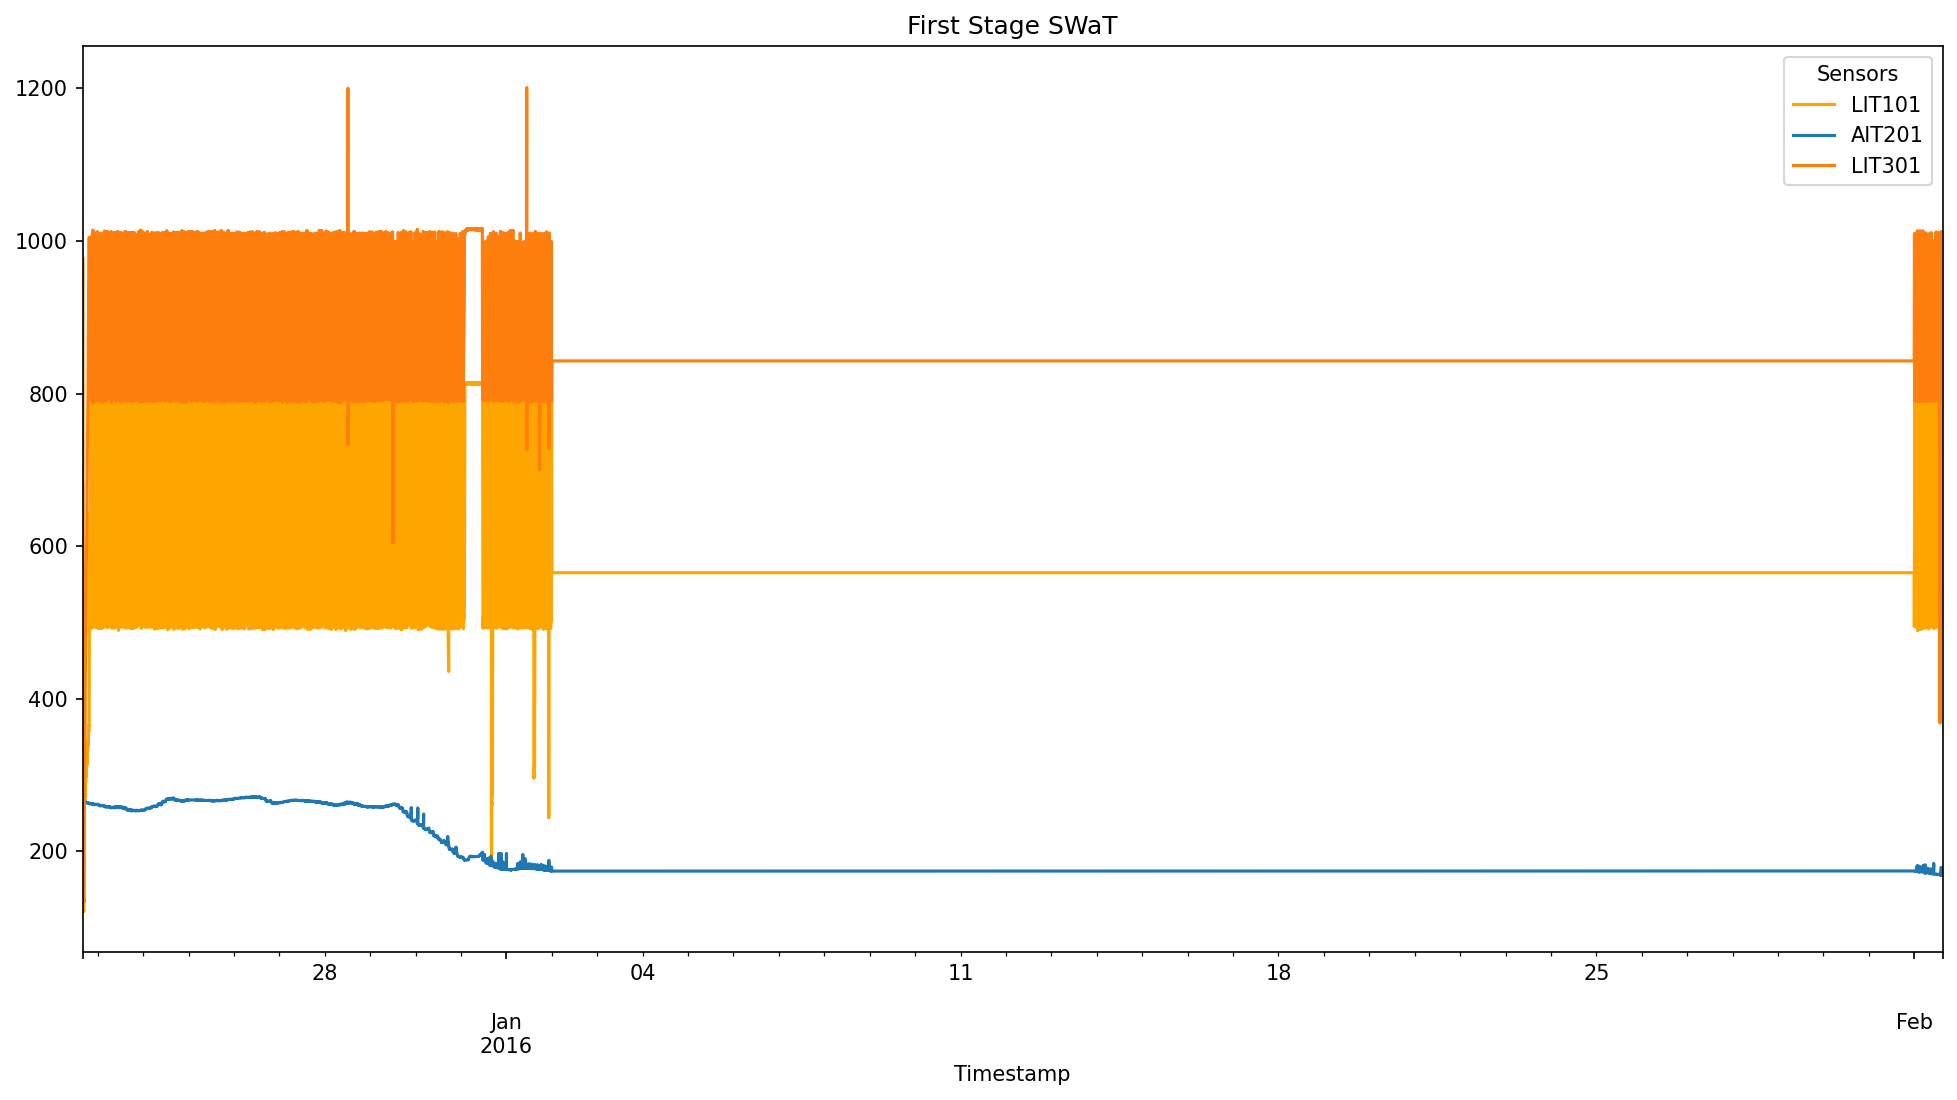

In [92]:
# code
# Visualizing The first stage with respect to time series 
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

df1['LIT101'].plot(label='LIT101', color='orange')
df1['AIT201'].plot(label='AIT201')

df1['LIT301'].plot(label='LIT301')

#df1.plot(subplots=True) 
  
# adding title to the plot
plt.title('First Stage SWaT')
  
# adding Label to the x-axis
plt.xlabel('Timestamp')
  
# adding legend to the curve
#plt.legend()
plt.legend(title='Sensors')
  

In [93]:
#To see how the data is spread betwen Attack and Normal after interpolation 
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count()) 
print(df1.groupby('A')['A'].count())   

A
0.000000    116105
0.033333         9
0.066667         2
0.133333         3
0.166667         4
0.200000         1
0.300000         3
0.333333         2
0.366667         4
0.400000         3
0.466667         1
0.533333         1
0.566667         2
0.600000         5
0.633333         1
0.666667         4
0.700000         5
0.733333         4
0.766667         1
0.800000         1
0.866667         2
0.900000         1
0.933333         3
0.966667         3
1.000000      1790
Name: A, dtype: int64


In [94]:
# make the class label into 2 since during sampling and interpolation it create the new class labels
df1.loc[df1['A'] >= 0.1, 'lablel'] = 1 
df1.loc[df1['A'] ==0.0, 'lablel'] = 0  

In [95]:
# fill the missing values with forward and backward of the cols 

df1=df1.fillna(method="ffill") 

In [96]:
print(df1.groupby('lablel')['lablel'].count())  

lablel
0.0    116105
1.0      1855
Name: lablel, dtype: int64


In [97]:
df1= df1.drop('A', axis=1) 

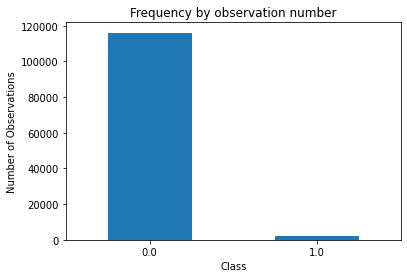

In [98]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(df1['lablel'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");   

#### Normalize using min Max scaler   

In [99]:
# # For content length, use the Min max Scalar.  
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['FIT101','LIT101','AIT201','AIT202','AIT203','FIT201','DPIT301','FIT301','FIT301','LIT301','AIT401',
            'AIT402','FIT401','LIT401','AIT501','AIT502','AIT503','AIT504','FIT501','FIT502','FIT503','FIT504',
            'PIT501','PIT502','PIT503','FIT601'] 
scaler = MinMaxScaler() 
df1[con_feats] = scaler.fit_transform(df1[con_feats])
df1.head()   

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,lablel
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,0.973730,0.177197,0.741168,0.734494,0.072905,0.875494,0.462307,0.973430,0.182210,0.0,...,0.018253,0.000711,0.000608,0.002186,0.0,0.004475,0.0,0.005924,0.000151,0.0
2015-12-22 16:00:30,0.976416,0.177591,0.751668,0.735883,0.071920,0.875159,0.461216,0.972744,0.183285,0.0,...,0.018253,0.000711,0.000608,0.002186,0.0,0.004485,0.0,0.005924,0.000151,0.0
2015-12-22 16:01:00,0.983019,0.177982,0.763248,0.736596,0.071097,0.874966,0.461022,0.972554,0.183928,0.0,...,0.018281,0.000711,0.000608,0.002186,0.0,0.004450,0.0,0.005924,0.000151,0.0
2015-12-22 16:01:30,0.987819,0.179349,0.773965,0.744073,0.069547,0.875274,0.460177,0.972456,0.185656,0.0,...,0.018222,0.000711,0.000608,0.002186,0.0,0.004266,0.0,0.005924,0.000151,0.0
2015-12-22 16:02:00,0.981106,0.179248,0.784403,0.751657,0.074129,0.875519,0.458782,0.972552,0.187299,0.0,...,0.018253,0.000711,0.000608,0.002186,0.0,0.004471,0.0,0.005762,0.000151,0.0


#### Split the Data to train and Test 

In [100]:
# Train test split (80/20 %) 
X_train, X_test, y_train, y_test = train_test_split(df1,df1['lablel'],test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
 

The number of records in the training dataset is 94368
The number of records in the test dataset is 23592


In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

(94368, 26)
(23592, 26)
(94368,)
(23592,)


#### Hyperparameter tuning for 30 second logs using Isolation forest for SWaT 

In [102]:
from sklearn import model_selection 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, f1_score 
clf = IsolationForest(random_state=47)

param_grid = {'n_estimators': [5,10,20,30,40],#list(range(100, 800)),#, 5)), 
              'max_samples': [5,10,20,30,40], #list(range(100, 500)),#, 5)), 
              'contamination': [0.1, 0.2, 0.3, 0.4],# 0.5], 
              'max_features': [5,10,15], 
              #'bootstrap': [True, False], 
              #'n_jobs': [5, 10, 20, 30]
             }

f1sc = make_scorer(f1_score, average='micro')

grid_search = model_selection.GridSearchCV(clf, 
                                                 param_grid,                                                  
                                                 refit=True,
                                                 scoring=f1sc,
                                                 cv=10, 
                                                 return_train_score=True)
#grid_dt_estimator.fit(X_train, X_test)

best_model = grid_search.fit(X_train.values, y_train) 

print('Optimum parameters', best_model.best_params_)    

Optimum parameters {'contamination': 0.1, 'max_features': 10, 'max_samples': 10, 'n_estimators': 5}


#### Train Isolation Forest Model  

In [31]:
# Model and performance
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
 

In [103]:
# Train the isolation forest model
if_model = IsolationForest(n_estimators=5,max_samples=10,contamination=0.1,random_state=47).fit(X_train)
# Predict the anomalies
if_prediction = if_model.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i==-1 else 0 for i in if_prediction]
 

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


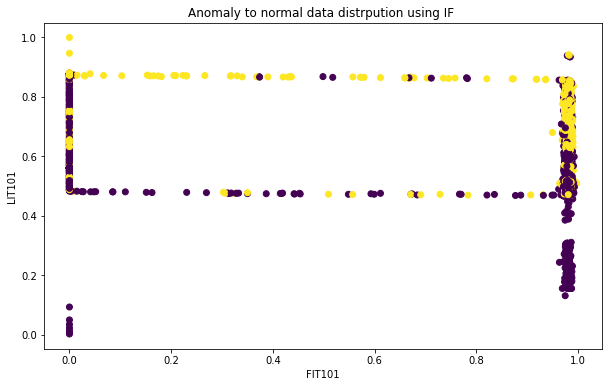

In [104]:
# visualize the anomaly points in the dataset with 2D
plt.figure(figsize=(10,6)) 
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=if_prediction)
plt.title("Anomaly to normal data distrpution using IF ")
plt.xlabel("FIT101")
plt.ylabel("LIT101")
plt.show() 

#### Determine anomaly score and identify anomalies  

In [105]:
result = X_test.copy()
result['scores'] = if_model.decision_function(X_test)
result['anomaly'] = if_model.predict(X_test)
result['anomaly'] = result['anomaly'].map( {1: 0, -1: 1} )
print(result['anomaly'].value_counts())  

0    21343
1     2249
Name: anomaly, dtype: int64


In [106]:
# filter anomaly feature which has 1 
anomaly = result.loc[result['anomaly'] == 1]
anomaly.head(5) 

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,lablel,scores,anomaly
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-24 11:06:30,0.979234,0.505978,0.932369,0.783220,0.171239,0.866899,0.441118,0.964825,0.765631,0.999935,...,0.956470,0.976174,0.985801,0.963142,0.527625,0.967003,0.000076,0.0,-0.038137,1
2015-12-25 14:46:00,0.977428,0.511242,0.948427,0.794961,0.139602,0.867301,0.439408,0.966133,0.779578,0.999935,...,0.965115,0.965225,0.974699,0.939005,0.394386,0.939043,0.000000,0.0,-0.038137,1
2015-12-26 06:52:00,0.982167,0.488510,0.988779,0.791015,0.161455,0.864770,0.447091,0.964822,0.674576,0.999903,...,0.953744,0.969721,0.977891,0.955975,0.360810,0.956837,0.000038,0.0,-0.038137,1
2015-12-24 00:01:00,0.000000,0.875000,0.827051,0.808583,0.145639,0.000000,0.445081,0.967472,0.745930,0.999903,...,0.956165,0.972760,0.980060,0.960337,0.365252,0.963538,0.000038,0.0,-0.037533,1
2015-12-25 03:19:30,0.985318,0.543674,0.954912,0.812000,0.128991,0.000000,0.050434,0.000000,0.822030,0.999903,...,0.944271,0.975754,0.979775,0.967458,0.341091,0.970801,0.000038,0.0,-0.038137,1


In [107]:
anomaly_index = list(anomaly.index)  

In [108]:
raw_anomaly = df1.loc[anomaly_index]  

In [109]:
raw_anomaly.head()
 

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,lablel
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-24 11:06:30,0.979234,0.505978,0.932369,0.783220,0.171239,0.866899,0.441118,0.964825,0.765631,0.999935,...,0.012961,0.975554,0.956470,0.976174,0.985801,0.963142,0.527625,0.967003,0.000076,0.0
2015-12-25 14:46:00,0.977428,0.511242,0.948427,0.794961,0.139602,0.867301,0.439408,0.966133,0.779578,0.999935,...,0.017789,0.987166,0.965115,0.965225,0.974699,0.939005,0.394386,0.939043,0.000000,0.0
2015-12-26 06:52:00,0.982167,0.488510,0.988779,0.791015,0.161455,0.864770,0.447091,0.964822,0.674576,0.999903,...,0.014321,0.978938,0.953744,0.969721,0.977891,0.955975,0.360810,0.956837,0.000038,0.0
2015-12-24 00:01:00,0.000000,0.875000,0.827051,0.808583,0.145639,0.000000,0.445081,0.967472,0.745930,0.999903,...,0.011154,0.977167,0.956165,0.972760,0.980060,0.960337,0.365252,0.963538,0.000038,0.0
2015-12-25 03:19:30,0.985318,0.543674,0.954912,0.812000,0.128991,0.000000,0.050434,0.000000,0.822030,0.999903,...,0.012792,0.975025,0.944271,0.975754,0.979775,0.967458,0.341091,0.970801,0.000038,0.0


In [110]:
#  counts of all unique value  in FIT101 
df1["FIT101"].value_counts()

0.000000    95494
0.983191        7
0.978164        7
0.983348        7
0.982270        7
            ...  
0.977568        1
0.974561        1
0.983389        1
0.986392        1
0.982533        1
Name: FIT101, Length: 15678, dtype: int64

In [111]:
# count Anomalies unique values in FIT101 
raw_anomaly["FIT101"].value_counts() 
#raw_anomaly["FIT101"].value_counts().sort_values().plot(kind = 'barh')  

0.000000    864
0.985569      3
0.982661      3
0.982118      2
0.986355      2
           ... 
0.975017      1
0.977124      1
0.982332      1
0.976087      1
0.980698      1
Name: FIT101, Length: 1354, dtype: int64

#### perfomance evalution using RMSE  

In [112]:
# Define a function to calculate MAE and RMSE
errors = if_prediction - y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of isolation forest'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')  

The performance  of isolation forest:

Mean Absolute Error: 0.1091
Mean Square Error:0.1091
Root Mean Square Error: 0.3302



#### Confusion matrix   

In [113]:
# Check the model performance
print(classification_report(y_test, if_prediction))  

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94     23230
         1.0       0.01      0.05      0.01       362

    accuracy                           0.89     23592
   macro avg       0.50      0.48      0.48     23592
weighted avg       0.97      0.89      0.93     23592

